<a href="https://colab.research.google.com/github/pngy87/-PTDLNC-GOOGLE-COLAB/blob/main/%5BCHAPTER%206%5D%20Logistic_Regression_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Logistic Regression

In [ ]:
#install dmba package
!pip install dmba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 37.5 MB/s eta 0:00:00


UniversalBank.csv là một bộ dữ liệu phân tích dữ liệu mô tả khách hàng của một ngân hàng, với mục tiêu thường là dự đoán khả năng khách hàng chấp nhận thẻ tín dụng cá nhân (Personal Loan).

Các biến trong UniversalBank.csv

* ID: Mã số định danh khách hàng (chỉ để phân biệt, không dùng trong mô hình).

* Age: Tuổi của khách hàng (tính theo năm).

* Experience: Số năm kinh nghiệm làm việc.

* Income: Thu nhập hằng năm (nghìn USD).

* ZIP Code: Mã bưu điện nơi khách hàng sinh sống.

* Family: Quy mô gia đình (số người trong hộ gia đình).

* CCAvg: Mức chi tiêu trung bình hằng tháng bằng thẻ tín dụng (nghìn USD).

* Education: Trình độ học vấn (mã hóa: 1 = Undergraduate, 2 = Graduate, 3 = Advanced/Professional).

* Mortgage:Giá trị khoản vay thế chấp nhà (USD).

* Securities Account: Khách hàng có tài khoản chứng khoán tại ngân hàng không (1 = Có, 0 = Không).

* CD Account: Khách hàng có tài khoản chứng chỉ tiền gửi (Certificate of Deposit) tại ngân hàng không (1 = Có, 0 = Không).

* Online: Khách hàng có sử dụng dịch vụ ngân hàng trực tuyến không (1 = Có, 0 = Không).

* CreditCard: Khách hàng có thẻ tín dụng do ngân hàng phát hành không (1 = Có, 0 = Không).

* Personal Loan: Biến mục tiêu (Target): khách hàng có chấp nhận khoản vay cá nhân từ ngân hàng hay không (1 = Có, 0 = Không).


In [ ]:
# Download UniversalBank.csv data file and save to Colab
!wget https://github.com/DanielTrieu/data_analytic/raw/refs/heads/main/data/UniversalBank.csv


--2025-09-21 08:43:34--  https://github.com/DanielTrieu/data_analytic/raw/refs/heads/main/data/UniversalBank.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DanielTrieu/data_analytic/refs/heads/main/data/UniversalBank.csv [following]
--2025-09-21 08:43:34--  https://raw.githubusercontent.com/DanielTrieu/data_analytic/refs/heads/main/data/UniversalBank.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205666 (201K) [text/plain]
Saving to: ‘UniversalBank.csv’

UniversalBank.csv   100%[===================>] 200.85K  --.-KB/s    in 0.04s   

2025-09-21 08:43:34 (5.59 MB/s) - ‘UniversalBank.csv

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
from sklearn.metrics import log_loss

Colab environment detected.


In [ ]:
# Load the dataset
bank_df = pd.read_csv('UniversalBank.csv')

# Drop unnecessary columns
bank_df.drop(columns=['ID', 'ZIP Code'], inplace=True)

# Replace spaces in column names with underscores
bank_df.columns = [c.replace(' ', '_') for c in bank_df.columns]

# Treat 'Education' as a categorical variable and rename its categories
bank_df['Education'] = bank_df['Education'].astype('category')
new_categories = {1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'}
bank_df['Education'] = bank_df['Education'].cat.rename_categories(new_categories)

# Convert categorical variables to dummy variables (one-hot encoding)
bank_df = pd.get_dummies(bank_df, prefix_sep='_', drop_first=True)


In [ ]:
bank_df

,Age,Experience,Income,Family,CCAvg,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Education_Graduate,Education_Advanced/Professional
0,25,1,49,4,1.6,0,0,1,0,0,0,False,False
1,45,19,34,3,1.5,0,0,1,0,0,0,False,False
2,39,15,11,1,1.0,0,0,0,0,0,0,False,False
3,35,9,100,1,2.7,0,0,0,0,0,0,True,False
4,35,8,45,4,1.0,0,0,0,0,0,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,0,0,0,0,1,0,False,True
4996,30,4,15,4,0.4,85,0,0,0,1,0,False,False
4997,63,39,24,2,0.3,0,0,0,0,0,0,False,True
4998,65,40,49,3,0.5,0,0,0,0,1,0,True,False


In [ ]:

# Define target (y) and features (X)
y = bank_df['PersonalLoan']
X = bank_df.drop(columns=['PersonalLoan'])

# Partition data into training and validation sets
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [ ]:
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())

intercept  -12.493436061176814
            Age  Experience    Income    Family     CCAvg  Mortgage  \
coeff -0.037685    0.039202  0.058844  0.612251  0.240489  0.001012   

       SecuritiesAccount  CDAccount    Online  CreditCard  Education_Graduate  \
coeff           -1.01428   3.649097 -0.678306   -0.958283            4.202148   

       Education_Advanced/Professional  
coeff                         4.355761  


In [ ]:
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y,
'p(0)': [p[0] for p in logit_reg_proba],
'p(1)': [p[1] for p in logit_reg_proba],
'predicted': logit_reg_pred })
print(logit_result)

      actual      p(0)      p(1)  predicted
2764       0  0.976092  0.023908          0
4767       0  0.999937  0.000063          0
3814       0  0.999900  0.000100          0
3499       0  0.998398  0.001602          0
2735       0  0.957211  0.042789          0
...      ...       ...       ...        ...
4372       0  0.996236  0.003764          0
3401       0  0.999644  0.000356          0
1239       0  0.999790  0.000210          0
437        0  0.998459  0.001541          0
415        0  0.992782  0.007218          0

[2000 rows x 4 columns]


In [ ]:

# display four different cases
interestingCases = [2764, 932, 2721, 702]
print(logit_result.loc[interestingCases])

      actual      p(0)      p(1)  predicted
2764       0  0.976092  0.023908          0
932        0  0.331000  0.669000          1
2721       1  0.031430  0.968570          1
702        1  0.985893  0.014107          0


In [ ]:
# training confusion matrix
classificationSummary(train_y, logit_reg.predict(train_X))
# validation confusion matrix
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.9600)

       Prediction
Actual    0    1
     0 2683   30
     1   90  197
Confusion Matrix (Accuracy 0.9595)

       Prediction
Actual    0    1
     0 1791   16
     1   65  128


In [ ]:
from sklearn.metrics import classification_report

# Training metrics
train_predictions = logit_reg.predict(train_X)
print("Training Metrics:")
print(classification_report(train_y, train_predictions))

# Validation metrics
valid_predictions = logit_reg.predict(valid_X)
print("Validation Metrics:")
print(classification_report(valid_y, valid_predictions))


Training Metrics:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2713
           1       0.87      0.69      0.77       287

    accuracy                           0.96      3000
   macro avg       0.92      0.84      0.87      3000
weighted avg       0.96      0.96      0.96      3000

Validation Metrics:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1807
           1       0.89      0.66      0.76       193

    accuracy                           0.96      2000
   macro avg       0.93      0.83      0.87      2000
weighted avg       0.96      0.96      0.96      2000



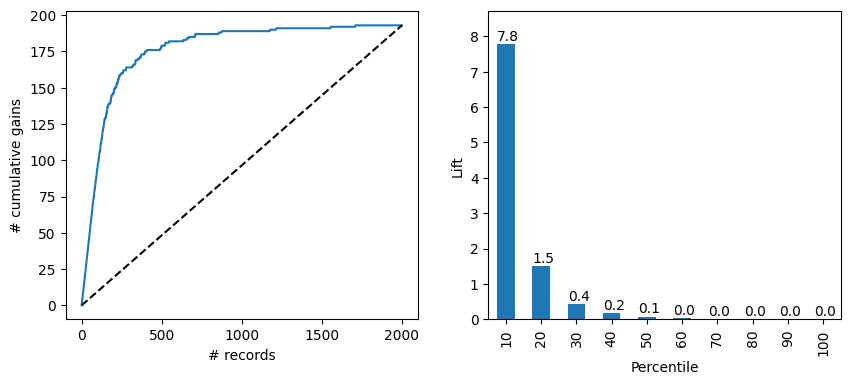

In [ ]:
df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
plt.show()

In [ ]:
# adjust threshold with decision tree

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Đặt threshold mong muốn
threshold = 0.4  # có thể đổi thành 0.5, 0.6, v.v.

# Training predictions với threshold
train_proba = logit_reg.predict_proba(train_X)[:, 1]
train_predictions = (train_proba >= threshold).astype(int)

print(f"Training Metrics @ threshold={threshold}")
print(confusion_matrix(train_y, train_predictions))
print(classification_report(train_y, train_predictions, zero_division=0))

# Validation predictions với threshold
valid_proba = logit_reg.predict_proba(valid_X)[:, 1]
valid_predictions = (valid_proba >= threshold).astype(int)

print(f"\nValidation Metrics @ threshold={threshold}")
print(confusion_matrix(valid_y, valid_predictions))
print(classification_report(valid_y, valid_predictions, zero_division=0))

Training Metrics @ threshold=0.4
[[2666   47]
 [  74  213]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2713
           1       0.82      0.74      0.78       287

    accuracy                           0.96      3000
   macro avg       0.90      0.86      0.88      3000
weighted avg       0.96      0.96      0.96      3000


Validation Metrics @ threshold=0.4
[[1783   24]
 [  56  137]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1807
           1       0.85      0.71      0.77       193

    accuracy                           0.96      2000
   macro avg       0.91      0.85      0.88      2000
weighted avg       0.96      0.96      0.96      2000

